# Monthly atmosphere variables
- This script is used to visualize atmosphere variables in a year;

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [6]:
# surface
path = '/work/n02/n02/yuansun/cesm/'
# surface
sfile = path + 'cesm_inputdata/lnd/clm2/surfdata_map/release-clm5.0.18/surfdata_0.9x1.25_hist_16pfts_Irrig_CMIP6_simyr1850_c190214.nc'
sf = xr.open_dataset(sfile)
#case0
path_0 = path + 'archive/case0/lnd/hist/'
#case1
path_1 = path + 'archive/case1/lnd/hist/'
#case2
path_2 = path + 'archive/case2/lnd/hist/'
#case3
path_3 = path + 'archive/case3/lnd/hist/'
#case4
path_4 = path + 'archive/case4/lnd/hist/'
#case5
path_5 = path + 'archive/case5/lnd/hist/'
#case6
path_6 = path + 'archive/case6/lnd/hist/'

clm_2099_0 = 'case0.clm2.h1.2099-02-01-00000.nc'
ds_0 = xr.open_dataset(path_0 + clm_2099_0)
clm_2099_1 = 'case1.clm2.h1.2099-02-01-00000.nc'
ds_1 = xr.open_dataset(path_1 + clm_2099_1)
clm_2099_2 = 'case2.clm2.h1.2099-02-01-00000.nc'
ds_2 = xr.open_dataset(path_2 + clm_2099_2)
clm_2099_3 = 'case3.clm2.h1.2099-02-01-00000.nc'
ds_3 = xr.open_dataset(path_3 + clm_2099_3)
clm_2099_4 = 'case4.clm2.h1.2099-02-01-00000.nc'
ds_4 = xr.open_dataset(path_4 + clm_2099_4)
clm_2099_5 = 'case5.clm2.h1.2099-02-01-00000.nc'
ds_5 = xr.open_dataset(path_5 + clm_2099_5)
clm_2099_6 = 'case6.clm2.h1.2099-02-01-00000.nc'
ds_6 = xr.open_dataset(path_6 + clm_2099_6)

In [8]:
default = xr.open_dataset(sfile)
mask = np.any(default['PCT_URBAN'] != 0, axis=0)
mask = mask.rename({'lsmlat': 'lat', 'lsmlon': 'lon'})

In [29]:
# drawing
linewidth=0.5
fontsize = 6
labelfont = 6
start_year = 2015
end_year = 2099
labelcolor = '#6b6b6b'
lc1 = '#6e1913'
lc2 = '#a42018'
lc3 = '#f62d18'
lc4 = '#d97c26'
lc5 = '#ff912b'
lc6 = '#30b5d6'
lc7 = '#28ac92'
lc8 = '#123264'
lc9 = '#05101f'
minor_locator = MultipleLocator(10)
specific_years = [2015, 2050, 2100]
alpha=0.075
pad=1
marker = 'o'
markerfacecolor = 'white'
markersize = 2
handletextpad=0.5
pad=1
xwidth = 0.75
padding = 4
num_case = [0,1,2,3,4,5]
ds = [ds_0, ds_1, ds_2, ds_3, ds_4, ds_5]
atm_var = ['TBOT', 'FSDS', 'FLDS', 'QBOT', 'PBOT', 'RAIN', 'SNOW']
time = [1,2,3,4,5,6,7,8,9,10,11,12]
lc = [lc1,lc2,lc3,lc4,lc5,lc6,lc7,lc8,lc9]
yl = ['℃', 'W m⁻²', 'W m⁻²', 'kg kg⁻¹', 'hPa', 'mm ms⁻¹', 'mm ms⁻¹']
p = [0.035, 0.1, 0.1, 0.14, 0.04, 0.14, 0.14]
ymin = [12.5, 125, 325, 0.0085, 95200/100, 0.00002*1000, 0]
ymax = [30, 250, 420, 0.016, 96000/100, 0.00005*1000, 0.000004*1000]
title = ['(a) TBOT', '(b) FSDS', '(c) FLDS', '(d) QBOT', '(e) PBOT', '(f) RAIN', '(g) SNOW']

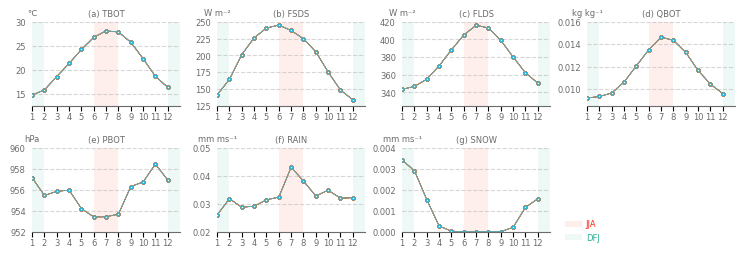

In [31]:
# Create a figure
fig1, axes = plt.subplots(nrows=2, ncols=4, figsize=(7.4, 2.5))
ax = axes.flatten()
ax[7].remove()

plt.subplots_adjust(left=0.04, right=0.99, bottom=0.1, top=0.94, wspace=0.25, hspace=0.5)


for i, atm_var_i in enumerate(atm_var):
    for j, case_j in enumerate(num_case):
        if atm_var_i == 'TBOT':
            ax[i].plot(time, ds[case_j][atm_var_i].where(mask).mean(dim=['lat', 'lon']) - 273.15, linewidth=linewidth, marker=marker, markerfacecolor=markerfacecolor,markersize = markersize, label=f'Case {case_j}', color=lc[j])
        elif atm_var_i == 'PBOT':
            ax[i].plot(time, ds[case_j][atm_var_i].where(mask).mean(dim=['lat', 'lon']) /100, linewidth=linewidth, marker=marker, markerfacecolor=markerfacecolor,markersize = markersize, label=f'Case {case_j}', color=lc[j])
        elif atm_var_i == 'RAIN' or atm_var_i == 'SNOW':
            ax[i].plot(time, ds[case_j][atm_var_i].where(mask).mean(dim=['lat', 'lon']) *1000, linewidth=linewidth, marker=marker, markerfacecolor=markerfacecolor,markersize = markersize, label=f'Case {case_j}', color=lc[j])    
        else:    
            ax[i].plot(time, ds[case_j][atm_var_i].where(mask).mean(dim=['lat', 'lon']), marker=marker, markerfacecolor=markerfacecolor, markersize = markersize, linewidth=linewidth, label=f'Case {case_j}', color=lc[j])
    ax[i].tick_params(axis='y', which='both', left=False, right=False, labelleft=True, labelcolor=labelcolor,pad=pad,labelsize=labelfont)
    ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,pad=pad,labelsize=labelfont)
    ax[i].set_xticks(time)
    ax[i].set_xlim(1,13)
    ax[i].grid(True, which='major', axis='y',linestyle='--',linewidth=0.8, alpha=0.5)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['bottom'].set_color(labelcolor)
    ax[i].set_ylabel(yl[i], labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
    ax[i].yaxis.set_label_coords(0, 1.05)
    ax[i].set_ylim(ymin[i], ymax[i])
    ax[i].fill_betweenx([ymin[i], ymax[i]],6, 8, color=lc3, alpha=alpha, label='JJA',edgecolor='none')
    ax[i].fill_betweenx([ymin[i], ymax[i]],12, 13, color=lc7, alpha=alpha, label='DFJ',edgecolor='none')
    ax[i].fill_betweenx([ymin[i], ymax[i]],1, 2, color=lc7, alpha=alpha, label='JJA',edgecolor='none')
    ax[i].set_title(title[i],fontsize=fontsize,color=labelcolor, pad=padding)

lines, labels = axes[0, 0].get_legend_handles_labels()  
lines_1 = lines[6:-1]
labels_1 = labels[6:-1]
legend = fig1.legend(lines_1, labels_1,bbox_to_anchor=(0.75, 0.03), loc='lower left',frameon=False,handletextpad=handletextpad,fontsize=labelfont)

for i, text in enumerate(legend.get_texts()):
    if i ==0:
        text.set_color(lc3)
    elif i == 1:
        text.set_color(lc7)
                       
plt.savefig('atm_month.png',dpi=300)     
plt.show()

In [21]:
plt.savefig('atm_month.pdf',dpi=600)   

<Figure size 640x480 with 0 Axes>

## Description

In [25]:
print(ds_1['PBOT'].where(mask).mean()- ds_2['PBOT'].where(mask).mean())

<xarray.DataArray 'PBOT' ()>
array(0., dtype=float32)


In [26]:
print(ds_1['TBOT'].where(mask).mean(dim = ['lat', 'lon'])-273.15)

<xarray.DataArray 'TBOT' (time: 12)>
array([14.733826, 15.947571, 18.645477, 21.440277, 24.540009, 26.72699 ,
       28.016296, 27.806152, 25.807037, 22.43515 , 18.447021, 15.718475],
      dtype=float32)
Coordinates:
  * time     (time) object 2100-02-01 00:00:00 ... 2101-01-01 00:00:00


In [27]:
print(ds_1['FSDS'].where(mask).mean(dim = ['lat', 'lon']))

<xarray.DataArray 'FSDS' (time: 12)>
array([138.54283, 161.31055, 198.7757 , 222.2462 , 238.68497, 238.22911,
       234.04233, 224.20287, 202.27176, 173.51811, 145.73024, 136.26964],
      dtype=float32)
Coordinates:
  * time     (time) object 2100-02-01 00:00:00 ... 2101-01-01 00:00:00


In [28]:
print(ds_1['PBOT'].where(mask).mean(dim = ['lat', 'lon']))

<xarray.DataArray 'PBOT' (time: 12)>
array([95729.74 , 95626.8  , 95541.89 , 95522.57 , 95349.05 , 95347.12 ,
       95335.664, 95332.64 , 95520.445, 95827.875, 95659.71 , 95740.84 ],
      dtype=float32)
Coordinates:
  * time     (time) object 2100-02-01 00:00:00 ... 2101-01-01 00:00:00
